# 教女友学习机器学习0X00——简单介绍与线性回归

## 前言
女友是商院经济学学生一枚，偏文科，最近要开始写论文了，买了一堆书回来，结果看了好几天，硬是没看懂，请教我的时候我才发现——我去！这里面的好多模型不就是机器学习吗？  
“什么叫机器学习？”女友很好奇地问我，“就是人工智能吗？”  
“呃……算是吧！”  
对于机器学习，我没有办法很直观地解释（其实是出于懒），我突然想到了我的机器学习启蒙课程——Andrew Ng在Coursera上的[机器学习](https://www.coursera.org/learn/machine-learning/)，于是乎，用了一晚上时间，给她弄好了翻墙和MATLAB，期待她能在知识的海洋里尽情遨游……  
然而，一切都是我的幻想！！当她学习到梯度下降的时候，已经云里雾里！  
这！可！咋！办！  
左思又想，还是得我亲自上阵，好好解释一番，就当是我也给自己梳理一下这门课程。  
这一系列博客中用的代码都是python3写的，为啥不用MATLAB？答案很自私——因为我MATLAB的代码已经敲过一遍了，没挑战，多无聊！强烈安利大家直接下载安装[Anaconda](https://www.continuum.io/downloads/)，里面Python的科学计算库相当完善。

## 线性回归（Linear Regreesion）
我们先不提有监督无监督学习，也不管是拟合还是分类，也不说找最优值的方法，直接先来线性回归的例子（监督学习、拟合），就是用线来拟合数据，入门的时候简单直观的学习比什么都重要。这里的数据使用的是Andrew Ng在Coursera上的[机器学习](https://www.coursera.org/learn/machine-learning/)提供的数据。

首先先导入Python要用的包，分别是numpy——进行科学计算的，和matplotlib——进行画图的。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#为了在jupyter上画图加上这句话
%matplotlib inline

导入data数据，数据格式之间是用逗号隔开的,打印前十个数据看看，我们发现每个数据是一个二维坐标

In [2]:
data=np.loadtxt('ex1data1.txt',delimiter=',')
print(data[0:10,:])

[[  6.1101  17.592 ]
 [  5.5277   9.1302]
 [  8.5186  13.662 ]
 [  7.0032  11.854 ]
 [  5.8598   6.8233]
 [  8.3829  11.886 ]
 [  7.4764   4.3483]
 [  8.5781  12.    ]
 [  6.4862   6.5987]
 [  5.0546   3.8166]]


x轴的数据是是data的第一列，y轴的数据是data的第二列，把这些二维坐标画在图上，我们发现了一些规律。

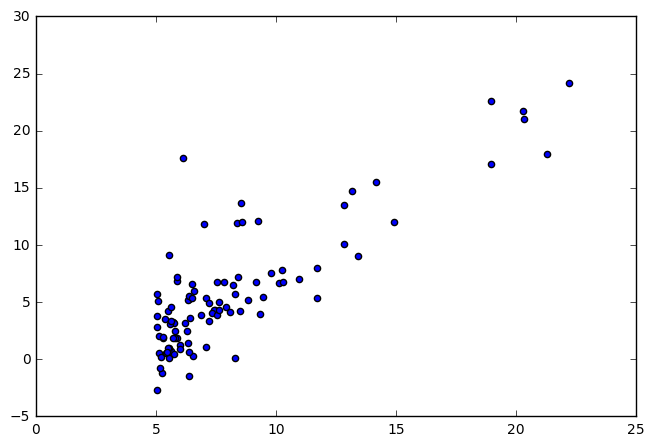

In [3]:
X=data[:,0]
y=data[:,1]
m=y.size
plt.axes([0,0,1,1])
plt.scatter(X,y)

## 预测函数
现在我有个要求，需要用一条线来代表这些点，貌似应该用一条直线比较合适，这时候是不是脑海中浮现了一个简单的公式：  
$y = ax + b$  
我们先统一一下符号，和Andrew Ng在Coursera上的[机器学习](https://www.coursera.org/learn/machine-learning/)上的符号一致。我们把  
$y = ax + b$替换为$h_{\theta}(x) = \theta _{0}x_{0}+\theta _{1}x_{1}$  
这里，$\theta _{0}$代表之前的$b$，$x_{0}$始终为1，$\theta _{1}$代表之前的a，$x_{1}$代表之前的$x$，$h_{\theta}(x)$就是预测函数值，也就是直线的输出。  
先来说一下啥价预测，在我们现在这个例子里面，$h_{\theta}(x) = \theta _{0}x_{0}+\theta _{1}x_{1}$就是预测函数，你输入一个横坐标的值，就会相应得到一个纵坐标的值，这些横纵坐标组合在一起，就是下面图中的那条线。  
让我们来看看$\theta _{0}$、$\theta _{1}$不同数值的情况下曲线的样子

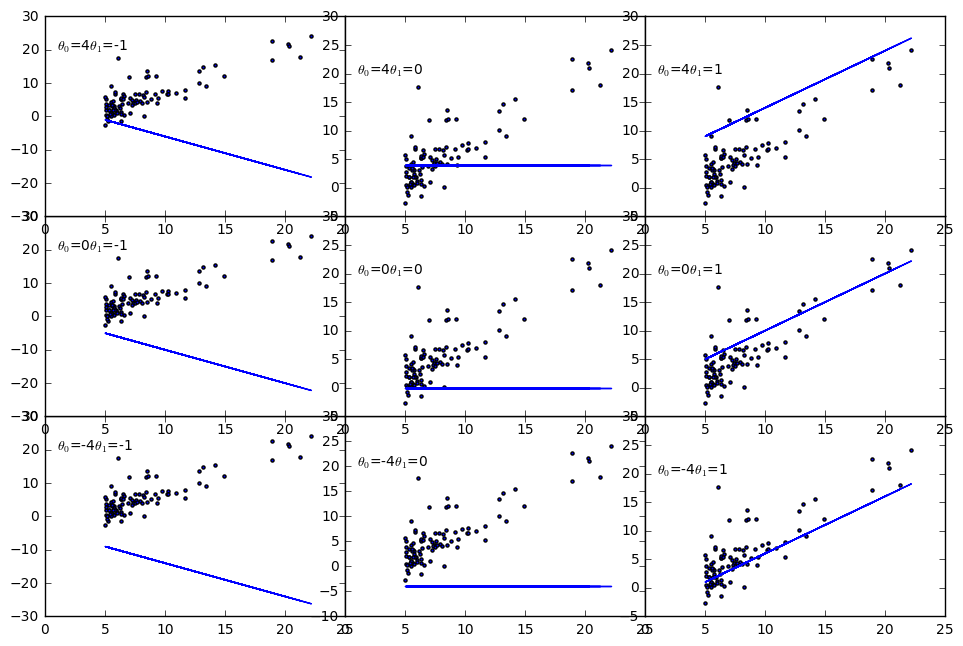

In [4]:
from itertools import *
for i,(a,b) in enumerate(product([-1,0,1],[-4,0,4])):
    #print(i,a,b)
    plt.axes([(a+1)/2,(b+4)/8,0.5,0.5])
    plt.scatter(X,y,marker='.')
    y1=a*X+b
    plt.plot(X,y1)
    plt.text(1,20,r'$\theta _{0}$'+'={}'.format(b)+r'$\theta _{1}$'+'={}'.format(a))

貌似，好像，也许……选择$\theta _{0}=0$，$\theta _{1}=1$,应该还不错，但是这个是最优的值吗？还有，这个最优应该如何定义呢？是否有衡量的标准呢？答案是有，衡量标准就是代价函数。

  
## 代价函数（Cost Function）
代价函数就是预测的值和实际值的误差，公式是：  
$J(\theta _{0},\theta _{1})=\frac{1}{2m}\sum_{i=0}^{m-1}\left ( h_{\theta}(x^{(i)})-y^{(i)} \right )^{2}$  
做一下翻译：  
m代表m个数据，也就是我们之前数据中data的长度，$x^{(i)}$代表第i个x值，$y^{(i)}$代表第i个y值，$h_{\theta}(x^{(i)})$是在选定某组参数$\theta$后，输入$x^{(i)}$预测输出的值，$x^{(i)}$和$y^{(i)}$构成了上图中的散点，$x^{(i)}$和$h_{\theta}(x^{(i)})$构成了上图中的直线。那么代价函数到底是干啥用的呢，说白了就是预测的值和实际的值在差了多少，看一下下面的图就明白了：  
![代价讲解](./代价讲解.png)  
在图中，实际的值和预测的值之间的垂直线就是他们之间的差距，代价函数就是要把所有这些点的差距累积起来求个平均，至于为什么要平方，道理也非常简单，差距有正有负，不能相互抵消，所有的差距必须都转换成正数。现在，我们要做的事情就是选定一组$\theta$，使得我们的代价函数最小，那么这组$\theta$，就是我们需要的最佳值。

## 优化
我研一的时候有一门课，叫做优化方法，里面从简单的梯度下降、牛顿下降到复杂的粒子群、遗传算法，只干一件事，就是找函数的最小值。Andrew Ng在他的[机器学习](https://www.coursera.org/learn/machine-learning/)课程开头，也讲了梯度下降法，并且一开始的几节课的内容都是用这个梯度下降来处理的。优化方法对于机器学习很重要，但是我个人觉得，在机器学习入门的时候就提优化方法，很容易让初学者跑偏，优化是一个重要但不太紧急的事情，可以以后再学，所以我的教程（至少是前面几章）不打算提优化方法这件事情，这里我们直接使用scipy的优化工具来优化。

## 矩阵运算
在进行优化之前，还有最后一个步骤要完成，就是把数据带入预测函数和代价函数，使得代价函数只和这组$\theta$有关，这里，将使用矩阵来计算。为啥用矩阵？第一个答案是速度，绝大数的科学计算软件库中，都有矩阵运算的库，调用矩阵运算，远比我们使用自己乘完加，加完乘快得多。第二个答案是便于思考，这个好处一开始真的感觉不到，我刚学Andrew Ng的[机器学习](https://www.coursera.org/learn/machine-learning/)课程的时候，看到使用矩阵运算这种方式，及其反感，看得我眼花缭乱，但是后来习惯了之后我发现从矩阵的角度来思考这些运算，使得我思路清晰了很多。第三个答案我不知道是啥，但肯定有其他的矩阵的优势，这个答案只能等学霸来告诉我了，对于本科线性代数只能勉强通过的我而言目前还没体会到。  
废话不多说，把之前的预测函数的公式改一下：  
$h_{\theta}(x) = \theta^T x = \theta _{0}x_{0}+\theta _{1}x_{1}$  
还记得之前的data吗？我说过第一列是x，第二列是y，不记得的话再看一遍：  
![数据截图](数据截图.png)  
这回，我们要先修改x，给x增加一列，这一列全为1,做好后打印看看，我们看到第0列为1，第1列为原来的x：

In [5]:
X=np.c_[np.ones(X.size),X]
print(X[0:10,:])

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]]


现在，可以定义预测函数和代价函数了，注意，在定义的时候，theta要放在第一个参数,剩下的参数是要填充的数据

In [6]:
def hypothesis(theta,X):
    return np.dot(X,theta.T)

def computer_cost(theta,X,y):
    return np.sum((y-hypothesis(X,theta))**2)/2/m

最后一步，进行优化，我们是针对代价函数进行优化，所以第一个填入了代价函数的名字，第二个是给theta来个初始值，我们这里给的是[1,1]，第三是优化的步子大小，这个暂时先不管，用0.1，第四个是迭代次数，我们这里填上500就够了，最后一个是找最小值使用的方法和要填充的数据。

In [7]:
from scipy import optimize
result=optimize.basinhopping(computer_cost,(1,1),stepsize=0.1,niter=500,
                             minimizer_kwargs={'method':'L-BFGS-B','args':(X,y)})
print(result.x)

[-3.89578089  1.19303364]


我们把优化出来的值带入到预测函数，画个图瞧瞧：

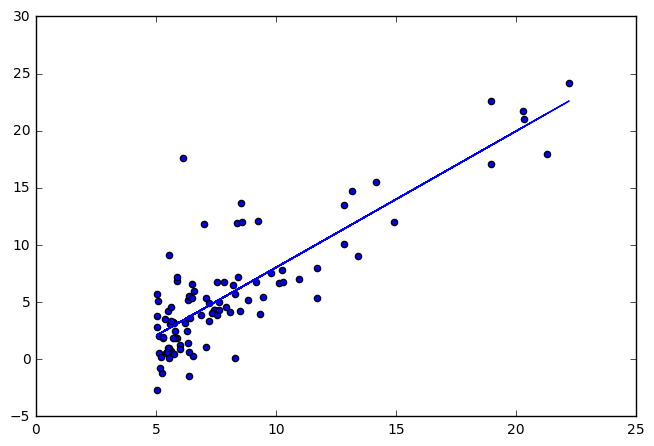

In [8]:
theta=result.x
plt.axes([0,0,1,1])
plt.scatter(X[:,1],y)
h=hypothesis(theta,X)
plt.plot(X[:,1],h)

## 总结
来，讲了那么多，终于讲完了一个最基础的例子，我们回归一下，核心只有三个步骤：  
设计预测函数----->设计代价函数----->优化代价函数

## 后记——对从小到大教育的思考
在我看来，我们从小到大，学习的知识是从核心到边缘，从理想到实际，从简单到复杂。大学之前的知识与大学知识的最大的观念上的差异就是上大学之前给我们引入的是世间万物是确定的简化的关系——小学的时候：汽车时速70km/h，3小时就会行驶210km，超级简单啊；高中的时候：在无摩擦的情况下，一个方块以5m/s的速度运行，另一个相同质量的方块以3m/s的速度相对运行，两个方块上装有弹簧发生弹性碰撞，二者交换速度，反向运行，难了点，不过还是非常确定的关系……  
在这些许许多多的实验中，我们会做许多假设，忽略各种因素，造就各种理想的模型，这样的好处是显而易见的，那就是可以透过各种杂七杂八的干扰观察世界，便于进行核心概念的理解和生活上简单的使用。然而，实际的情况并非如此简单，高中的时候，我相信很多人做过一个实验，一个纸带上挂一个重物，放在桌子边沿释放，打点计时器在上面打点，取下纸带后，我们发现纸带上的点的间隔越来越宽，用尺子量一量，貌似、好像接近我们的加速度公式的结果，但是，误差好像还有一点点大。  
没错，这才是我们在现实中测量遇到的现象，但是就算是实验会遇到，做题的时候也不会有这种题目，所以我们没有对这个实验结果进行太多的思考……当然，高中的数学其实也引入了误差的概念，比如线性回归方程，就是在各种点中找到最符合预期的一条直线，使得总误差最小。  
在大学中，我们会发现，下坠物体的模型越来越复杂了，会考虑风速、摩擦了，要思考测量误差了；房价不仅仅和面积有关了，也和楼层、布局、小区位置有关了；在进行系统设计的时候，需要考虑噪声的大小，需要避免系统陷入不稳定……我们要建立的模型越来越复杂了，公式越来越多了，得出来的结论越来越不是一个确定的数，而是一个范围或者是概率了，其实，这也就是越来越接近实际了。